# PROJECT

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

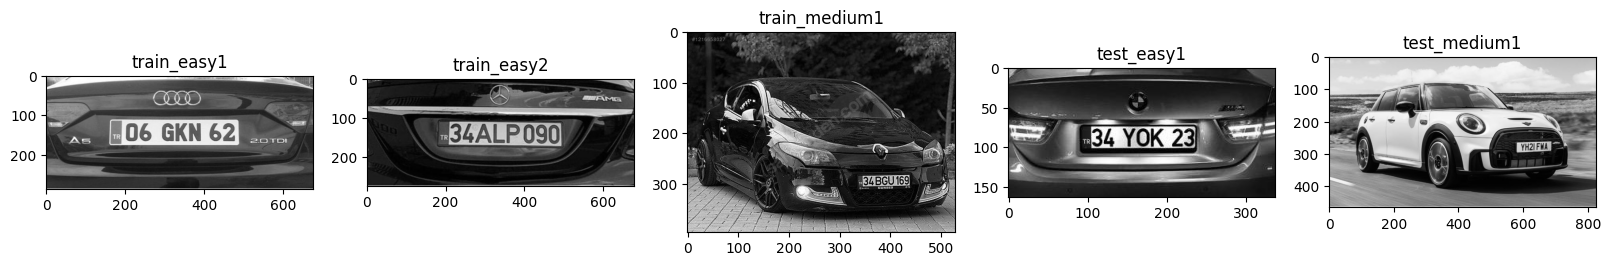

In [3]:
train_easy1 = cv2.imread('images_gray/train_images/train_easy1.jpg')
train_easy2 = cv2.imread('images_gray/train_images/train_easy2.jpg')
train_medium1 = cv2.imread('images_gray/train_images/train_medium1.jpg')

test_easy1= cv2.imread('images_gray/test_images/test_easy1.jpg')
test_medium1 = cv2.imread('images_gray/test_images/test_medium1.jpg')

train_easy1_gray = cv2.cvtColor(train_easy1, cv2.COLOR_BGR2GRAY)
train_easy2_gray = cv2.cvtColor(train_easy2, cv2.COLOR_BGR2GRAY)
train_medium1_gray = cv2.cvtColor(train_medium1, cv2.COLOR_BGR2GRAY)

test_easy1_gray = cv2.cvtColor(test_easy1, cv2.COLOR_BGR2GRAY)
test_medium1_gray = cv2.cvtColor(test_medium1, cv2.COLOR_BGR2GRAY)

images = [train_easy1, train_easy2, train_medium1, test_easy1, test_medium1]
titles = ['train_easy1', 'train_easy2', 'train_medium1', 'test_easy1', 'test_medium1']

fig, axes = plt.subplots(1, 5, figsize=(20, 5))

for ax, img, title in zip(axes, images, titles):
	if img is not None:
		ax.imshow(img, cmap='gray')
		ax.axis('on')
		ax.set_title(title)
	else:
		ax.text(0.5, 0.5, 'Image not found', fontsize=12, ha='center')
		ax.axis('off')

plt.show()

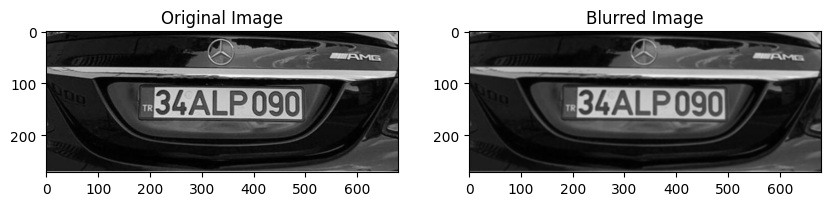

In [4]:
blurred_train_easy1 = cv2.GaussianBlur(train_easy2, (5, 5), 0)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(train_easy2, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(blurred_train_easy1, cmap='gray')
plt.title('Blurred Image')

plt.show()

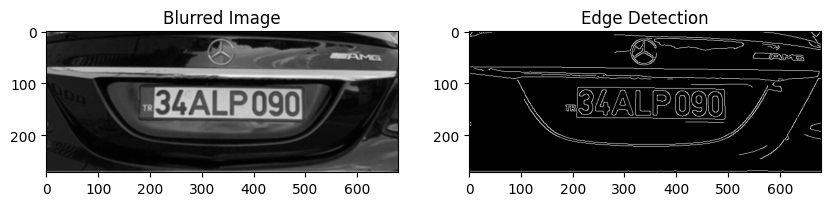

In [5]:
edges = cv2.Canny(blurred_train_easy1, 100, 200)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(blurred_train_easy1, cmap='gray')
plt.title('Blurred Image')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')

plt.show()

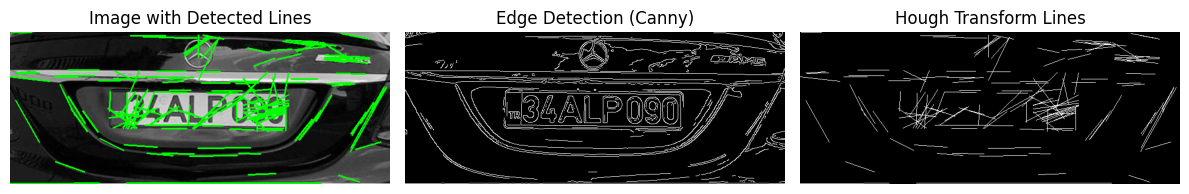

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import itertools

# Load the image
image = cv2.imread('images_gray/train_images/train_easy2.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray, 100, 150)

# Detect lines using Hough Transform
lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=1, minLineLength=35, maxLineGap=10)

# Draw lines on the image
if lines is not None:
    lines = [line[0] for line in lines]  # Simplify lines array
    for x1, y1, x2, y2 in lines:
        cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green lines for visibility

    # Optionally, you can use itertools to find line intersections and rectangles
    # For simplicity, rectangle detection logic is omitted
    rectangles = []
    for line1, line2 in itertools.combinations(lines, 2):
        # Compute intersections and check if they form valid rectangles
        pass  # Add geometry check for rectangle logic

    # Draw rectangles (if any found)
    for rect in rectangles:
        cv2.polylines(image, [np.array(rect, dtype=np.int32)], isClosed=True, color=(0, 0, 255), thickness=2)

# Plot the results
plt.figure(figsize=(12, 6))

# Display the original image with detected lines
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert to RGB for correct display in matplotlib
plt.title('Image with Detected Lines')
plt.axis('off')

# Display the edge-detected image (Canny edges)
plt.subplot(1, 3, 2)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection (Canny)')
plt.axis('off')

# Display the lines (if necessary, you can plot only the lines)
line_image = np.zeros_like(image)
if lines is not None:
    for x1, y1, x2, y2 in lines:
        cv2.line(line_image, (x1, y1), (x2, y2), (255, 255, 255), 1)  # White lines

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
plt.title('Hough Transform Lines')
plt.axis('off')

plt.tight_layout()
plt.show()


In [7]:
train_easy1 = cv2.imread('images_gray/train_images/train_easy1.jpg')
train_easy2 = cv2.imread('images_gray/train_images/train_easy2.jpg')
train_medium1 = cv2.imread('images_gray/train_images/train_medium1.jpg')

test_easy1= cv2.imread('images_gray/test_images/test_easy1.jpg')
test_medium1 = cv2.imread('images_gray/test_images/test_medium1.jpg')

train_easy1_gray = cv2.cvtColor(train_easy1, cv2.COLOR_BGR2GRAY)
train_easy2_gray = cv2.cvtColor(train_easy2, cv2.COLOR_BGR2GRAY)
train_medium1_gray = cv2.cvtColor(train_medium1, cv2.COLOR_BGR2GRAY)

test_easy1_gray = cv2.cvtColor(test_easy1, cv2.COLOR_BGR2GRAY)
test_medium1_gray = cv2.cvtColor(test_medium1, cv2.COLOR_BGR2GRAY)

images = [train_easy1, train_easy2, train_medium1, test_easy1, test_medium1]
titles = ['train_easy1', 'train_easy2', 'train_medium1', 'test_easy1', 'test_medium1']

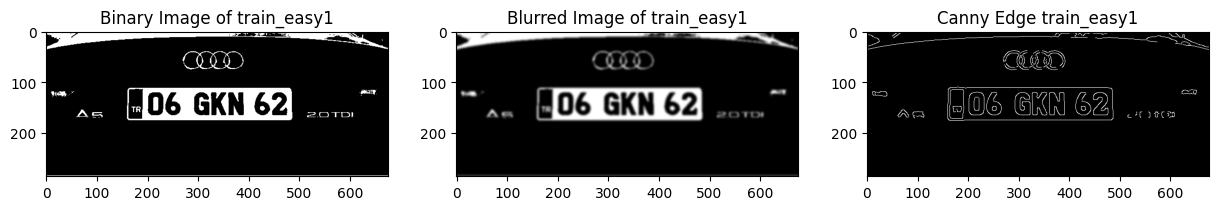

In [8]:
# Convert the image to grayscale if it is not already
gray_train_easy1 = cv2.cvtColor(train_easy1, cv2.COLOR_BGR2GRAY)

# Apply binary thresholding
_, binary_train_easy1 = cv2.threshold(gray_train_easy1, 180, 255, cv2.THRESH_BINARY)
blurred_train_easy1 = cv2.GaussianBlur(binary_train_easy1, (11, 11), 0)
binary_after_edges = cv2.Canny(blurred_train_easy1, 170, 250)

# Plot the binary image
plt.figure(figsize=(15, 15))

plt.subplot(1,3,1)
plt.imshow(binary_train_easy1, cmap='gray')
plt.title('Binary Image of train_easy1')

plt.subplot(1, 3, 2)
plt.imshow(blurred_train_easy1, cmap='gray')
plt.title('Blurred Image of train_easy1')

plt.subplot(1,3,3)
plt.imshow(binary_after_edges, cmap='gray')
plt.title('Canny Edge train_easy1')
plt.show()

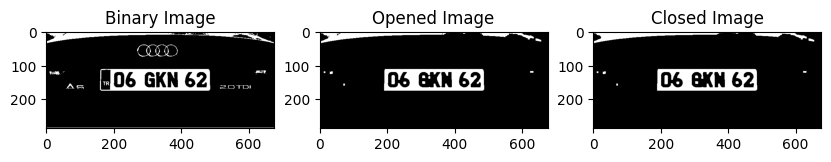

In [9]:
# Yapı elemanı oluşturma (örneğin, 3x3 boyutunda bir kare)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

# Morfolojik açma işlemi
opened_image = cv2.morphologyEx(binary_train_easy1, cv2.MORPH_OPEN, kernel)
# Morfolojik kapama işlemi
closed_image = cv2.morphologyEx(opened_image, cv2.MORPH_CLOSE, kernel)

# Sonucu görselleştirme
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(binary_train_easy1, cmap='gray')
plt.title('Binary Image')

plt.subplot(1, 3, 2)
plt.imshow(opened_image, cmap='gray')
plt.title('Opened Image')

plt.subplot(1, 3, 3)
plt.imshow(closed_image, cmap='gray')
plt.title('Closed Image')

plt.show()

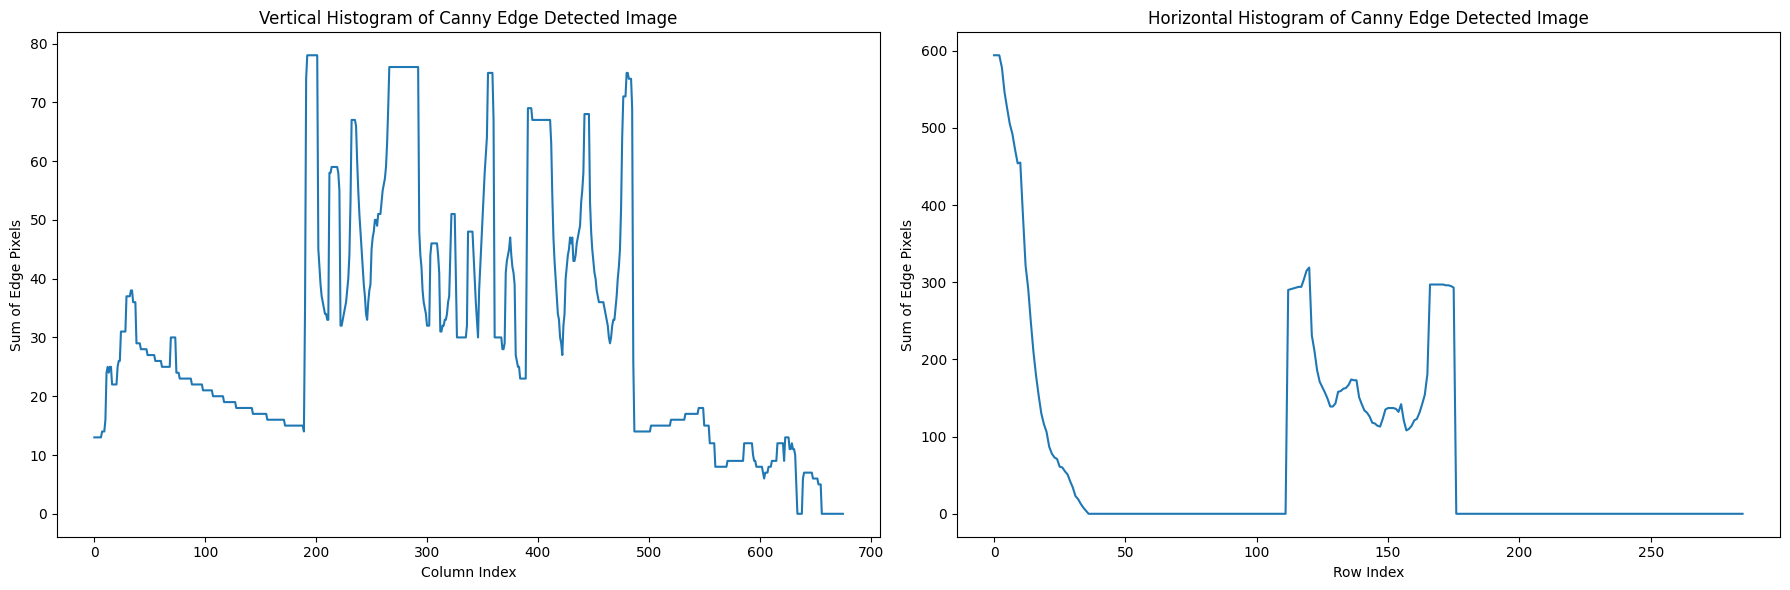

In [10]:
# Calculate the histogram for vertical and horizontal directions
horizontal_hist = np.sum(closed_image == 255, axis=1)  # Her satırdaki beyaz piksel sayısı

# Vertical histogram
vertical_hist = np.sum(closed_image == 255, axis=0)  # Her sütundaki beyaz piksel sayısı

# Plot the histograms
plt.figure(figsize=(18, 6))

# Plot the vertical histogram
plt.subplot(1, 2, 1)
plt.plot(vertical_hist)
plt.title('Vertical Histogram of Canny Edge Detected Image')
plt.xlabel('Column Index')
plt.ylabel('Sum of Edge Pixels')

# Plot the horizontal histogram
plt.subplot(1, 2, 2)
plt.plot(horizontal_hist)
plt.title('Horizontal Histogram of Canny Edge Detected Image')
plt.xlabel('Row Index')
plt.ylabel('Sum of Edge Pixels')

plt.tight_layout()
plt.show()

1.0
1.0
4.851851851851852
2.35
2.0
1.5
3.0
1.1666666666666667


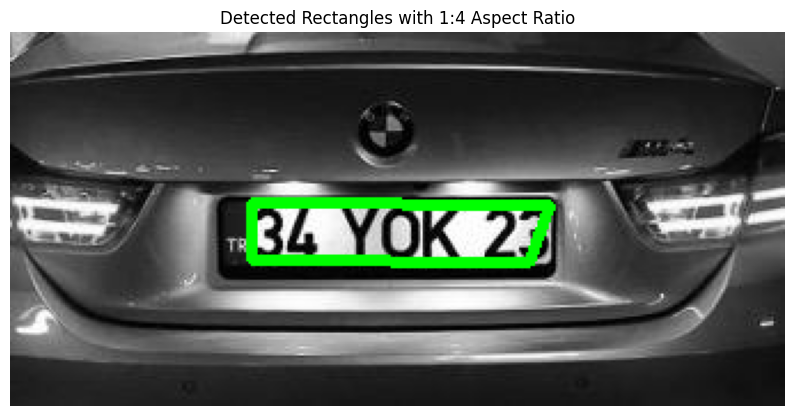

In [53]:

# Step 1: Load the image
image = cv2.imread('images_gray/test_images/test_easy1.jpg')  # Replace "image_path.jpg" with your image file
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

blurred = cv2.GaussianBlur(gray, (5, 5), 0)  # Apply Gaussian blur
_, binary = cv2.threshold(blurred, 127, 255, cv2.THRESH_BINARY)  # Binarize the image

# Step 2: Find contours
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Step 3: Identify and draw rectangles
for contour in contours:
    # Approximate the contour
    epsilon = 0.05 * cv2.arcLength(contour, True)  # Adjust epsilon as needed
    approx = cv2.approxPolyDP(contour, epsilon, True)

    # Check if the approximated contour has 4 points and is convex
    if len(approx) == 4 and cv2.isContourConvex(approx):
        # Optionally, check the aspect ratio to ensure it's a rectangle
        (x, y, w, h) = cv2.boundingRect(approx)
        aspect_ratio = float(w) / h
        print(aspect_ratio)
        if 3.2 <= aspect_ratio <= 6:
            cv2.drawContours(image, [approx], -1, (0, 255, 0), 3)  # Draw the rectangle

plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Detected Rectangles with 1:4 Aspect Ratio")
plt.axis('off')
plt.show()

import re
import imutils
import pytesseract


contours = cv2.findContours(binary_after_edges.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

contours = imutils.grab_contours(contours)
#Tersten sıralama yaptırıyoruz ve ilk 10 değeri çekiyoruz.
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]
screenCnt = 0

for c in contours: # -> https://stackoverflow.com/questions/62274412/cv2-approxpolydp-cv2-arclength-how-these-works

    _ = cv2.arcLength(c, True)
    #https://docs.opencv.org/master/d3/dc0/group__imgproc__shape.html#ga8d26483c636be6b35c3ec6335798a47c
    approx = cv2.approxPolyDP(c, 0.018 * _, True)
    #Daha düzgün dikdörtgen algılatmak
    # Dörtgen bir cisim
    if len(approx) == 4:
        screenCnt = approx
        break

if screenCnt is None:
    detected = 0
else:
    detected = 1  #Eğer varsa

if detected == 1:
    cv2.drawContours(train_easy1, [screenCnt], -1, (0, 0, 255), 3) # Kontür çizilir.

mask = np.zeros(train_easy1.shape[:2], np.uint8)

new_image = cv2.drawContours(mask,[screenCnt],0,255,-1,)
new_image = cv2.bitwise_and(train_easy1,train_easy1,mask=mask)
#https://stackoverflow.com/questions/44333605/what-does-bitwise-and-operator-exactly-do-in-opencv/52429616
#algılanan resmin dışındakileri siyah yapar

(x, y) = np.where(mask == 255)
#np.where(mask<5,-1,100) şeklinde çalışsaydı eğer
#koşulu sağlamadığında -1 değerini atayacak sağladığında 100
#np.where(mask==255) olduğunda ise true false döndürecek

(tx, ty) = (np.min(x), np.min(y)) # Dizinin minimum ve maksimum elemanını buluyor.
(bx, by) = (np.max(x), np.max(y))
Cropped = gray[tx:bx+1, ty:by+1] #tx = bx + 1 kadar, ty=by +1 kadar
custom_config = r'-l eng --psm 6' #config l dil kodu --psm
text = pytesseract.image_to_string(Cropped, config=custom_config)
# Plaka yazısını okuma

#Özel karakterlerin plakadan kaldırılması.
plateNoFix = text.replace("\n","")
plateNoFix2 = plateNoFix.replace("\f", "")
plateNoFix3 = plateNoFix2.strip("#")
resultPlateText = re.sub('[()"{}<>!-]', '', plateNoFix3)
train_easy1 = cv2.resize(train_easy1,(500,300))
Cropped = cv2.resize(Cropped,(200,70))

#Sonuçları görselleştirme
plt.figure(figsize=(15, 15))
plt.subplot(1, 3, 1)
plt.imshow(train_easy1, cmap='gray')
plt.title('Detected Plate Area')



